In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
 
df = pd.read_csv("C:/Users/linus/OneDrive/Desktop/Data/AV/AVFinalEven.csv")
df.drop(['Num'],axis=1, inplace=True)
df = pd.get_dummies(df)

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import preprocessing
data_scaled = pd.DataFrame(preprocessing.scale(df),columns = df.columns) 
data_scaled

,Object ID,Action,Temperature,Humidity,Access Violation,pA,pB,pC,pD,Participant ID_p_A,...,Weather_Partly clear,Heat Index_Comfortable,Heat Index_Danger,Heat Index_Hot,Heat Index_Warm,Date_weekday,Date_weekend,Time_afternoon,Time_morning,Time_night
0,-0.484266,-0.977270,-0.364936,0.709937,1.0,1.876028,1.414214,1.786833,-0.196992,-0.630548,...,6.137318,-0.253417,-0.290021,0.652863,-0.437928,-1.620185,1.620185,-0.684364,-0.800943,1.563824
1,1.108169,-0.977270,0.836934,-0.615591,-1.0,-0.533041,-0.707107,-0.559649,-0.196992,-0.630548,...,-0.162938,-0.253417,-0.290021,0.652863,-0.437928,-1.620185,1.620185,1.461210,-0.800943,-0.639458
2,-0.484266,-0.977270,-1.967428,-0.819518,1.0,1.876028,1.414214,1.786833,-0.196992,-0.630548,...,-0.162938,3.946065,-0.290021,-1.531716,-0.437928,0.617213,-0.617213,-0.684364,-0.800943,1.563824
3,-0.484266,1.023259,1.237557,-0.921482,1.0,1.876028,1.414214,1.786833,5.076340,-0.630548,...,-0.162938,-0.253417,-0.290021,0.652863,-0.437928,-1.620185,1.620185,1.461210,-0.800943,-0.639458
4,-0.452096,-0.977270,0.436311,-0.309700,1.0,-0.533041,-0.707107,-0.559649,-0.196992,-0.630548,...,-0.162938,-0.253417,-0.290021,0.652863,-0.437928,-1.620185,1.620185,-0.684364,-0.800943,1.563824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,-0.484266,1.023259,0.436311,-0.309700,-1.0,1.876028,1.414214,1.786833,-0.196992,1.585923,...,-0.162938,-0.253417,-0.290021,0.652863,-0.437928,-1.620185,1.620185,-0.684364,-0.800943,1.563824
344,2.716690,1.023259,-0.364936,0.811900,-1.0,-0.533041,-0.707107,1.786833,-0.196992,-0.630548,...,-0.162938,-0.253417,-0.290021,0.652863,-0.437928,0.617213,-0.617213,-0.684364,1.248529,-0.639458
345,-0.484266,-0.977270,0.836934,-0.309700,-1.0,1.876028,1.414214,-0.559649,-0.196992,-0.630548,...,-0.162938,-0.253417,-0.290021,0.652863,-0.437928,0.617213,-0.617213,1.461210,-0.800943,-0.639458
346,2.716690,1.023259,0.436311,-0.819518,-1.0,-0.533041,-0.707107,1.786833,-0.196992,-0.630548,...,-0.162938,-0.253417,-0.290021,0.652863,-0.437928,0.617213,-0.617213,1.461210,-0.800943,-0.639458


In [2]:
pca = PCA(n_components=2)
pca.fit(data_scaled)
x_pca = pca.transform(data_scaled)
x_pca

components = pd.DataFrame(pca.components_,columns=data_scaled.columns,index = ['PC-1','PC-2'])
components = components.T

components['PC-1'] = components['PC-1'].abs()
components['PC-2'] = components['PC-2'].abs()
components

,PC-1,PC-2
Object ID,0.177743,0.194650
Action,0.012527,0.056240
Temperature,0.020092,0.050315
Humidity,0.037438,0.021672
Access Violation,0.254828,0.085194
pA,0.192681,0.191728
pB,0.261790,0.188455
pC,0.194193,0.181698
pD,0.070946,0.168930
Participant ID_p_A,0.112215,0.229878


In [3]:
components.sort_values('PC-1', inplace=True, ascending=False)
components['PC-1']

Object Type_Appliance     0.347376
Object Type_Room          0.347376
Luminosity_Dark           0.347376
Location_Kitchen          0.312295
Luminosity_Bright         0.270095
pB                        0.261790
Access Violation          0.254828
pC                        0.194193
pA                        0.192681
Location_Main Entrance    0.188468
Object ID                 0.177743
Location_Bedroom 1        0.164932
Role_Child A              0.164932
Participant ID_p_B        0.164932
Luminosity_Dim            0.135063
Participant ID_p_A        0.112215
Role_Parent               0.112215
Location_Bedroom 2        0.110037
Age_Teenager              0.107214
Age_Adult                 0.107214
Heat Index_Hot            0.081018
Heat Index_Danger         0.080069
pD                        0.070946
Location_Living Room      0.057147
Date_weekend              0.041211
Date_weekday              0.041211
Weather_Mostly cloudy     0.037511
Humidity                  0.037438
Heat Index_Warm     

In [4]:
components.sort_values('PC-2', inplace=True, ascending=False)
components['PC-2']

Age_Adult                 0.373264
Age_Teenager              0.373264
Role_Child B              0.315197
Participant ID_p_C        0.315197
Role_Parent               0.229878
Participant ID_p_A        0.229878
Participant ID_p_D        0.225245
Role_Guest                0.225245
Location_Main Entrance    0.220014
Object ID                 0.194650
pA                        0.191728
pB                        0.188455
pC                        0.181698
pD                        0.168930
Location_Bedroom 2        0.158546
Role_Child A              0.092781
Location_Bedroom 1        0.092781
Participant ID_p_B        0.092781
Access Violation          0.085194
Luminosity_Dark           0.059144
Object Type_Room          0.059144
Object Type_Appliance     0.059144
Location_Living Room      0.057594
Action                    0.056240
Luminosity_Dim            0.052989
Temperature               0.050315
Time_afternoon            0.047315
Weather_Partly clear      0.042646
Weather_Mostly sunny

In [5]:

kmeans_pca = KMeans(n_clusters = 2, init = 'k-means++', random_state=42)
kmeans_pca.fit(x_pca)

C:\Users\linus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

In [6]:
df_pca_kmeans = pd.concat([df.reset_index(drop = True), pd.DataFrame(x_pca)],axis=1)
df_pca_kmeans.columns.values[-2: ] = ['Component 1', 'Component 2']
df_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

In [7]:
df_pca_kmeans.head()

,Object ID,Action,Temperature,Humidity,Access Violation,pA,pB,pC,pD,Participant ID_p_A,...,Heat Index_Hot,Heat Index_Warm,Date_weekday,Date_weekend,Time_afternoon,Time_morning,Time_night,Component 1,Component 2,Segment K-means PCA
0,101,0,30,69,1,1,1,1,0,0,...,1,0,0,1,0,0,1,1.991396,4.359831,1
1,200,0,33,56,0,0,0,0,0,0,...,1,0,0,1,1,0,0,3.203970,-1.763023,1
2,101,0,26,54,1,1,1,1,0,0,...,0,0,1,0,0,0,1,2.595307,3.995184,1
3,101,1,34,53,1,1,1,1,1,0,...,1,0,0,1,1,0,0,2.446587,5.228081,1
4,103,0,32,59,1,0,0,0,0,0,...,1,0,0,1,0,0,1,-2.437508,-2.251498,0


In [8]:
df_pca_kmeans['Segment'] =  df_pca_kmeans['Segment K-means PCA'].map({0:'first cluster',1:'second cluster'})
df_pca_kmeans

,Object ID,Action,Temperature,Humidity,Access Violation,pA,pB,pC,pD,Participant ID_p_A,...,Heat Index_Warm,Date_weekday,Date_weekend,Time_afternoon,Time_morning,Time_night,Component 1,Component 2,Segment K-means PCA,Segment
0,101,0,30,69,1,1,1,1,0,0,...,0,0,1,0,0,1,1.991396,4.359831,1,second cluster
1,200,0,33,56,0,0,0,0,0,0,...,0,0,1,1,0,0,3.203970,-1.763023,1,second cluster
2,101,0,26,54,1,1,1,1,0,0,...,0,1,0,0,0,1,2.595307,3.995184,1,second cluster
3,101,1,34,53,1,1,1,1,1,0,...,0,0,1,1,0,0,2.446587,5.228081,1,second cluster
4,103,0,32,59,1,0,0,0,0,0,...,0,0,1,0,0,1,-2.437508,-2.251498,0,first cluster
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,101,1,32,59,0,1,1,1,0,1,...,0,0,1,0,0,1,2.314045,3.708956,1,second cluster
344,300,1,30,70,0,0,0,1,0,0,...,0,1,0,0,1,0,2.923292,-2.763823,1,second cluster
345,101,0,33,59,0,1,1,0,0,0,...,0,1,0,1,0,0,2.829305,-0.711833,1,second cluster
346,300,1,32,54,0,0,0,1,0,0,...,0,1,0,1,0,0,2.816541,-2.758162,1,second cluster


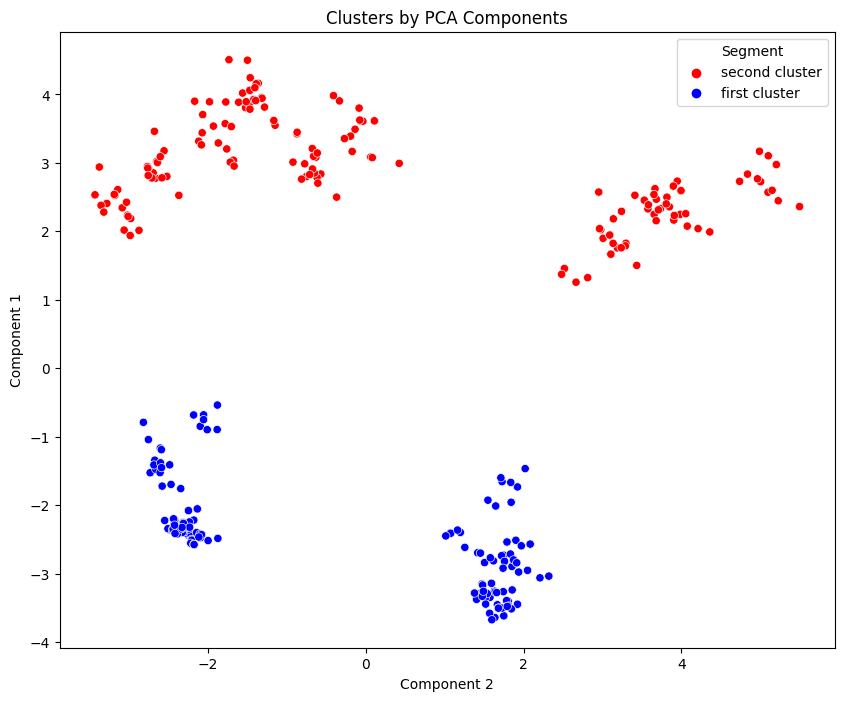

In [9]:

plt.figure(figsize = (10,8))
sns.scatterplot(data=df_pca_kmeans, x='Component 2', y='Component 1', hue =  df_pca_kmeans['Segment'], palette= ['r','b'])
plt.title('Clusters by PCA Components')
plt.show()

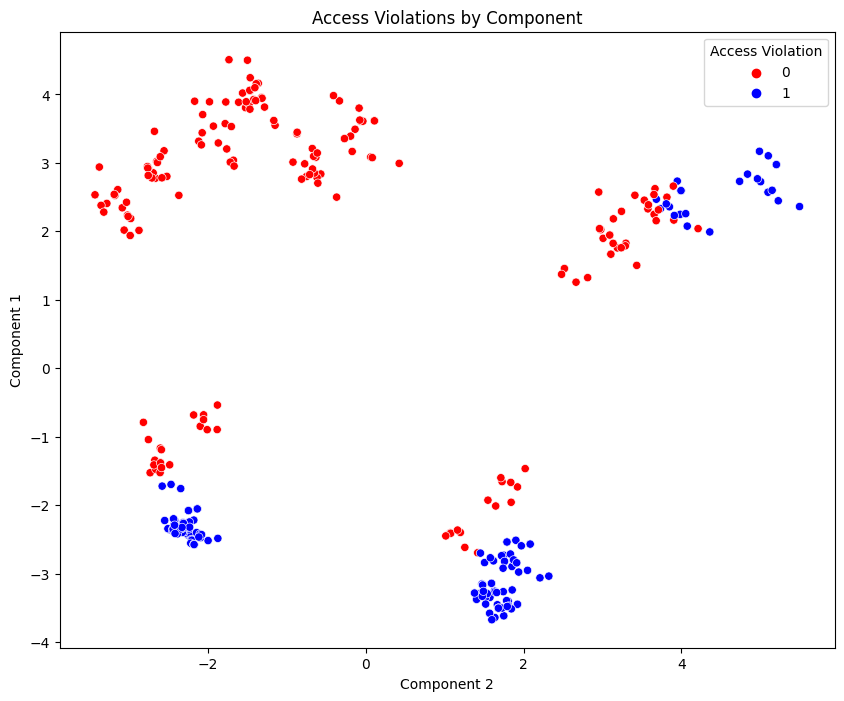

In [10]:
plt.figure(figsize = (10,8))
sns.scatterplot(data=df_pca_kmeans, x='Component 2', y='Component 1', hue =  df_pca_kmeans['Access Violation'], palette= ['r','b'])
plt.title('Access Violations by Component')
plt.show()

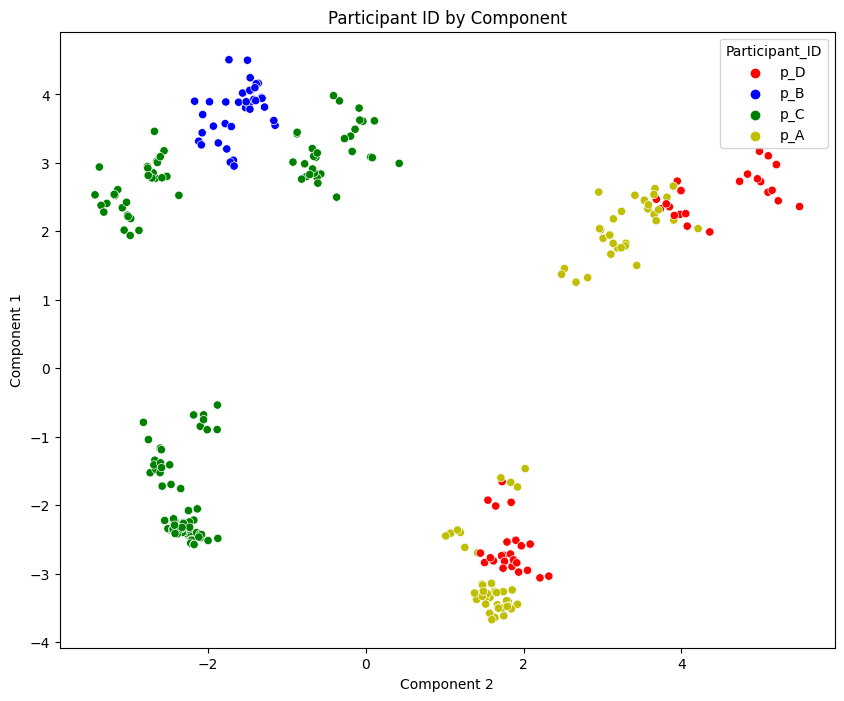

In [11]:
Participant_ID =[]
for i in df_pca_kmeans.index:
    if df_pca_kmeans['Participant ID_p_A'][i] == 1:
        Participant_ID.append("p_A")
    elif df_pca_kmeans['Participant ID_p_B'][i] == 1:
        Participant_ID.append("p_B")
    elif df_pca_kmeans['Participant ID_p_C'][i] == 1:
        Participant_ID.append("p_C")
    elif df_pca_kmeans['Participant ID_p_D'][i] == 1:
        Participant_ID.append("p_D")
df_pca_kmeans['Participant_ID']= Participant_ID
plt.figure(figsize = (10,8))
sns.scatterplot(data=df_pca_kmeans, x='Component 2', y='Component 1', hue =  df_pca_kmeans['Participant_ID'], palette= ['r','b','g','y'])
plt.title('Participant ID by Component')
plt.show()

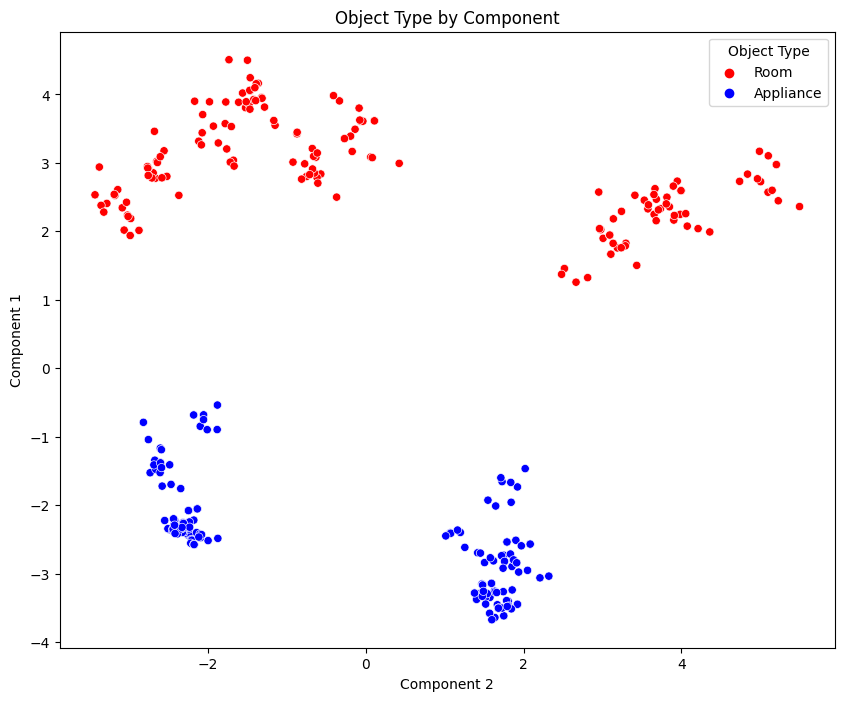

In [14]:
ObjectType =[]
for i in df_pca_kmeans.index:
    if df_pca_kmeans['Object Type_Appliance'][i] == 1:
        ObjectType.append("Appliance")
    elif df_pca_kmeans['Object Type_Room'][i] == 1:
        ObjectType.append("Room")
df_pca_kmeans['Object Type']= ObjectType
plt.figure(figsize = (10,8))
sns.scatterplot(data=df_pca_kmeans, x='Component 2', y='Component 1', hue =  df_pca_kmeans['Object Type'], palette= ['r','b'])
plt.title('Object Type by Component')
plt.show()

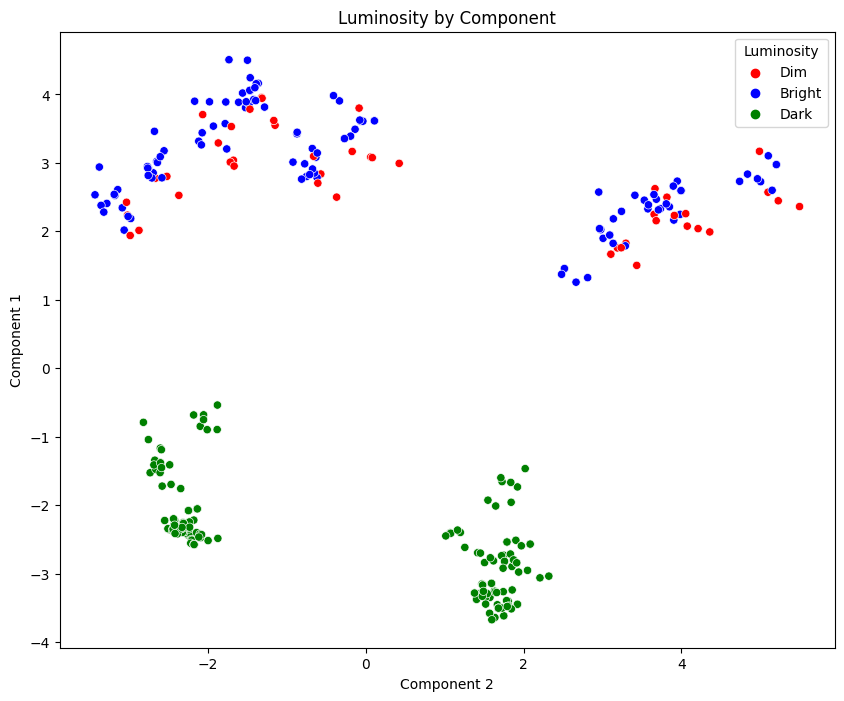

In [15]:
Luminosity =[]
for i in df_pca_kmeans.index:
    if df_pca_kmeans['Luminosity_Bright'][i] == 1:
        Luminosity.append("Bright")
    elif df_pca_kmeans['Luminosity_Dark'][i] == 1:
        Luminosity.append("Dark")
    elif df_pca_kmeans['Luminosity_Dim'][i] == 1:
        Luminosity.append("Dim")
df_pca_kmeans['Luminosity']= Luminosity
plt.figure(figsize = (10,8))
sns.scatterplot(data=df_pca_kmeans, x='Component 2', y='Component 1', hue =  df_pca_kmeans['Luminosity'], palette= ['r','b','g'])
plt.title('Luminosity by Component')
plt.show()

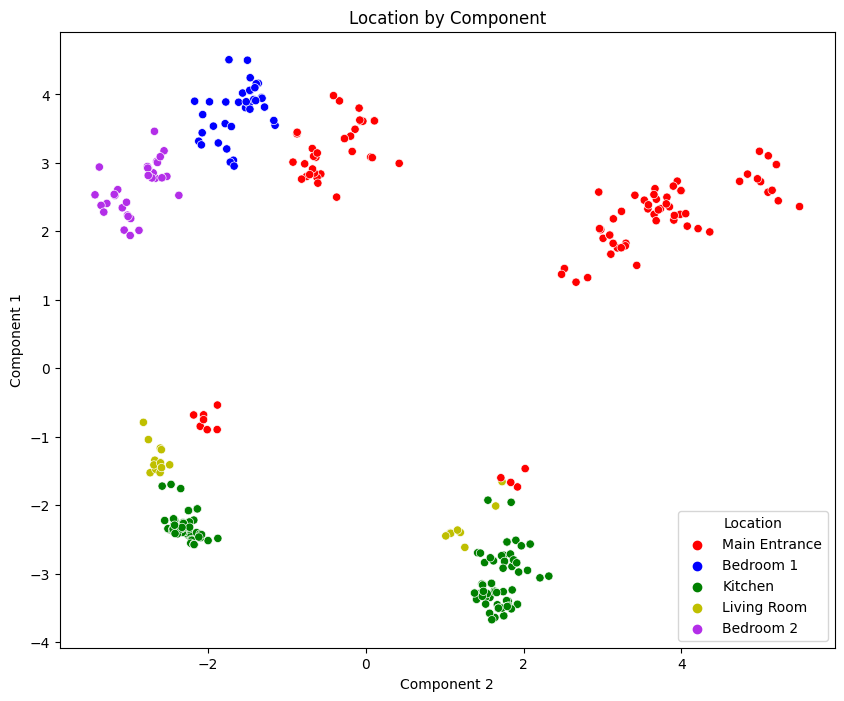

In [20]:
Location =[]
for i in df_pca_kmeans.index:
    if df_pca_kmeans['Location_Kitchen'][i] == 1:
        Location.append("Kitchen")
    elif df_pca_kmeans['Location_Bedroom 1'][i] == 1:
        Location.append("Bedroom 1")
    elif df_pca_kmeans['Location_Living Room'][i] == 1:
        Location.append("Living Room")
    elif df_pca_kmeans['Location_Bedroom 2'][i] == 1:
        Location.append("Bedroom 2")
    elif df_pca_kmeans['Location_Main Entrance'][i] == 1:
        Location.append("Main Entrance")
df_pca_kmeans['Location']= Location
plt.figure(figsize = (10,8))
sns.scatterplot(data=df_pca_kmeans, x='Component 2', y='Component 1', hue =  df_pca_kmeans['Location'], palette= ['r','b','g','y','#b32ee8'])
plt.title('Location by Component')
plt.show()